In [1]:
import time
from tqdm import *
import random
from math import *
import operator
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
plt.figure(figsize=(9,6))

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing, cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
"""
5. Number of Instances: 214
6. Number of Attributes: 10 (including an Id#) plus the class attribute
   -- all attributes are continuously valued
7. Attribute Information:
   1. Id number: 1 to 214
   2. RI: refractive index
   3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as 
                  are attributes 4-10)
   4. Mg: Magnesium
   5. Al: Aluminum
   6. Si: Silicon
   7. K: Potassium
   8. Ca: Calcium
   9. Ba: Barium
  10. Fe: Iron
  11. Type of glass: (class attribute)
      -- 1 building_windows_float_processed
      -- 2 building_windows_non_float_processed
      -- 3 vehicle_windows_float_processed
      -- 4 vehicle_windows_non_float_processed (none in this database)
      -- 5 containers
      -- 6 tableware
      -- 7 headlamps

9. Class Distribution: (out of 214 total instances)
    -- 163 Window glass (building windows and vehicle windows)
       -- 87 float processed  
          -- 70 building windows
          -- 17 vehicle windows
       -- 76 non-float processed
          -- 76 building windows
          -- 0 vehicle windows
    -- 51 Non-window glass
       -- 13 containers
       -- 9 tableware
       -- 29 headlamps
"""

'\n5. Number of Instances: 214\n6. Number of Attributes: 10 (including an Id#) plus the class attribute\n   -- all attributes are continuously valued\n7. Attribute Information:\n   1. Id number: 1 to 214\n   2. RI: refractive index\n   3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as \n                  are attributes 4-10)\n   4. Mg: Magnesium\n   5. Al: Aluminum\n   6. Si: Silicon\n   7. K: Potassium\n   8. Ca: Calcium\n   9. Ba: Barium\n  10. Fe: Iron\n  11. Type of glass: (class attribute)\n      -- 1 building_windows_float_processed\n      -- 2 building_windows_non_float_processed\n      -- 3 vehicle_windows_float_processed\n      -- 4 vehicle_windows_non_float_processed (none in this database)\n      -- 5 containers\n      -- 6 tableware\n      -- 7 headlamps\n\n9. Class Distribution: (out of 214 total instances)\n    -- 163 Window glass (building windows and vehicle windows)\n       -- 87 float processed  \n          -- 70 building windows\n          --

In [3]:
# location = r"E:\MYLEARN\2-ANALYTICS-DataScience\datasets\glass.csv"

In [4]:
# load the training data from glass data set
# df_training = pd.read_csv(location)

In [5]:
# Question: Pretend that we want to predict ri, and our only feature is al. 
# How could we do it using machine learning?

# Answer: We could frame it as a regression problem, and use a linear 
#         regression model with al as the only feature and ri as the 
#         response.

# Question: How would we visualize this model?

# Answer: Create a scatter plot with al on the x-axis and ri on the y-axis, 
#         and draw the line of best fit.

In [6]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
col_names = ['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass = pd.read_csv(url, names=col_names, index_col='id')

glass.sort_values ('al', inplace=True)

glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
id,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1


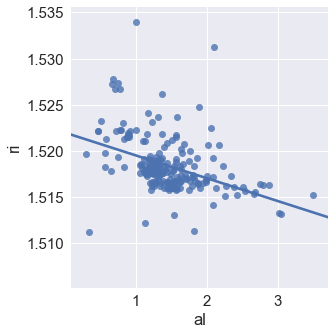

In [7]:
plt.figure(figsize=(12,6))
sns.lmplot(x='al', y='ri', data=glass, ci=None)

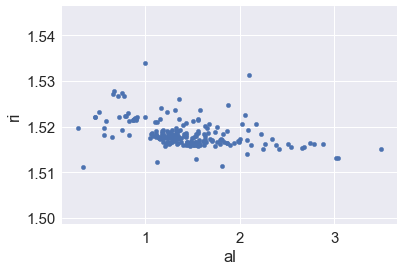

In [8]:
# Question: How would we draw this plot without using Seaborn?

# scatter plot using Pandas
plt.figure(figsize=(12,6))
glass.plot(kind='scatter', x='al', y='ri')

Text(0,0.5,'ri')

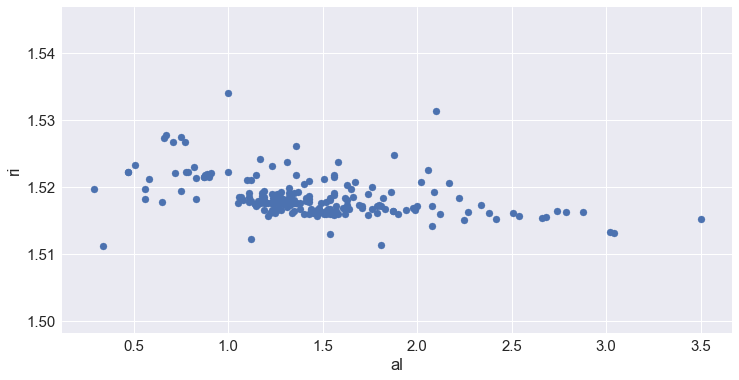

In [9]:
# equivalent scatter plot using Matplotlib
plt.figure(figsize=(12,6))

plt.scatter(glass.al, glass.ri)
plt.xlabel('al')
plt.ylabel('ri')

In [10]:
# fit a linear regression model

linreg       = LinearRegression()
feature_cols = ['al']
X            = glass[feature_cols]
y            = glass.ri

linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
# make predictions for all values of X
glass['ri_pred'] = linreg.predict(X)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,ri_pred
id,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682


Text(0,0.5,'Predicted RI')

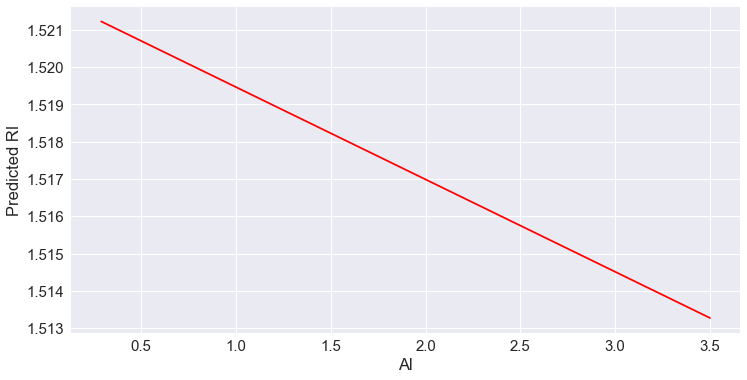

In [12]:
# plot those predictions connected by a line
plt.figure(figsize=(12,6))

plt.plot(glass.al, glass.ri_pred, color='red')
plt.xlabel('Al')
plt.ylabel('Predicted RI')

Text(0,0.5,'ri')

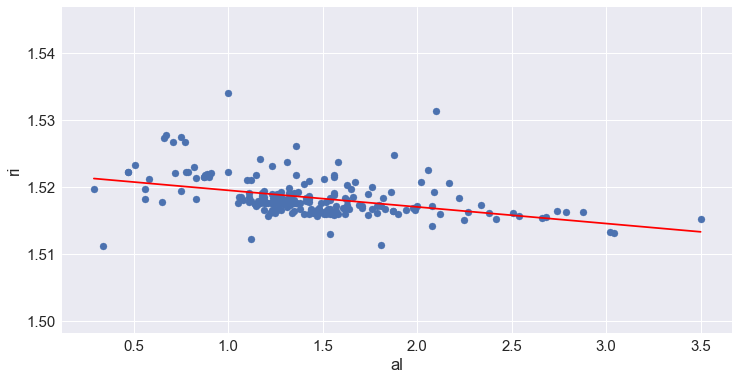

In [13]:
# put the plots together
plt.figure(figsize=(12,6))

plt.scatter(glass.al, glass.ri)
plt.plot(glass.al, glass.ri_pred, color='red')

plt.xlabel('al')
plt.ylabel('ri')

Refresher: interpreting linear regression coefficients
Linear regression equation: y=β0+β1x

In [14]:
# compute prediction for al=2 using the equation
linreg.intercept_ + linreg.coef_ * 2

array([1.51699012])

In [15]:
# compute prediction for al=2 using the predict method
linreg.predict(2)

array([1.51699012])

In [16]:
# examine coefficient for al
zip(feature_cols, linreg.coef_)

In [18]:
linreg.coef_

array([-0.00247761])

Interpretation: A 1 unit increase in 'al' is associated with a 0.0025 unit decrease in 'ri'.

Predicting a Categorical Response

In [19]:
# examine glass_type
glass.glass_type.value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: glass_type, dtype: int64

In [21]:
# types 1, 2, 3 are window glass
# types 5, 6, 7 are household glass
glass['household'] = glass.glass_type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})

glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,ri_pred,household
id,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103,1
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682,0


Let's change our task, so that we're predicting household type using al. 
Let's visualize the relationship to figure out how to do this:

Text(0,0.5,'household')

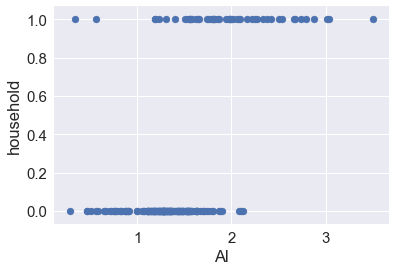

In [22]:
plt.scatter(glass.al, glass.household)
plt.xlabel('Al')
plt.ylabel('household')

Let's draw a regression line, like we did before:

In [23]:
# fit a linear regression model and store the predictions
feature_cols = ['al']
X = glass[feature_cols]
y = glass.household

linreg.fit(X, y)
glass['household_pred'] = linreg.predict(X)

glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,ri_pred,household,household_pred
id,,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227,0,-0.340495
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103,1,-0.315436
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682,0,-0.230236


Text(0,0.5,'household')

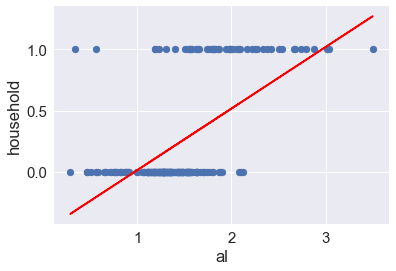

In [41]:
# scatter plot that includes the regression line

plt.scatter(df_training.Al, df_training.household)
plt.plot(df_training.Al, df_training.household_pred, color='red')

plt.xlabel('al')
plt.ylabel('household')

If al=3, what class do we predict for household? 1

If al=1.5, what class do we predict for household? 0

We predict the 0 class for lower values of al, and the 1 class for higher values of al. 

What's our cutoff value? Around al=2, because that's where the linear regression line crosses 
the midpoint between predicting class 0 and class 1.

Therefore, we'll say that if household_pred >= 0.5, we predict a class of 1, else we predict a class of 0.

In [24]:
# understanding np.where
nums = np.array([5, 15, 8])

# np.where returns the first value if the condition is True, and 
# the second value if the condition is False
np.where(nums > 10, 'big', 'small')

array(['small', 'big', 'small'], dtype='<U5')

In [25]:
# transform household_pred to 1 or 0
glass['household_pred_class'] = np.where(glass.household_pred >= 0.5, 1, 0)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,ri_pred,household,household_pred,household_pred_class
id,,,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227,0,-0.340495,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103,1,-0.315436,0
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682,0,-0.230236,0


Text(0,0.5,'household')

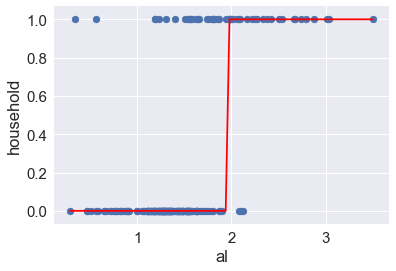

In [26]:
# plot the class predictions
plt.scatter(glass.al, glass.household)
plt.plot(glass.al,    glass.household_pred_class, color='red')

plt.xlabel('al')
plt.ylabel('household')

In [ ]:
# Using Logistic Regression Instead
# Logistic regression can do what we just did:

In [27]:
logreg = LogisticRegression(C=1e9)

feature_cols = ['al']

X = glass[feature_cols]
y = glass.household

logreg.fit(X, y)

glass['household_pred_class'] = logreg.predict(X)

Text(0,0.5,'household')

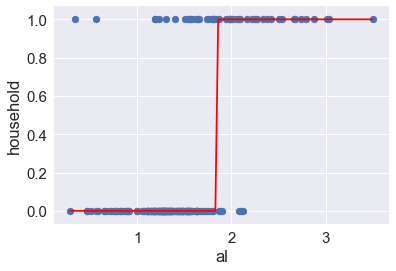

In [28]:
# plot the class predictions
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_class, color='red')

plt.xlabel('al')
plt.ylabel('household')

In [29]:
# What if we wanted the predicted probabilities instead of just the class predictions, 
# to understand how confident we are in a given prediction?

In [30]:
# store the predicted probabilites of class 1
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]

Text(0,0.5,'household')

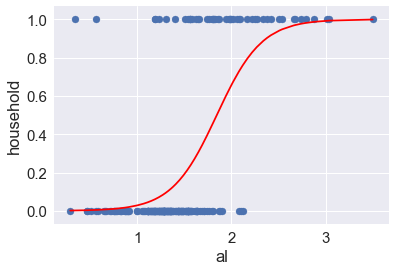

In [31]:
# plot the predicted probabilities
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_prob, color='red')

plt.xlabel('al')
plt.ylabel('household')

In [32]:
# examine some example predictions
print (logreg.predict_proba(1))
print (logreg.predict_proba(2))
print (logreg.predict_proba(3))

[[0.97161726 0.02838274]]
[[0.34361555 0.65638445]]
[[0.00794192 0.99205808]]


In [ ]:
# The first column indicates the predicted probability of class 0, and 
# the second column indicates the predicted probability of class 1.

Linear regression: continuous response is modeled as a linear combination of the features:

y=β0+β1x

Logistic regression: log-odds of a categorical response being "true" (1) is modeled as a linear combination of the features:

log(p/1−p) = β0+β1x
This is called the logit function.

Probability is sometimes written as pi:

log(π/1−π) = β0+β1x
The equation can be rearranged into the logistic function:

π=eβ0+β1x1/ 1+ eβ0+β1x
In other words:

Logistic regression outputs the probabilities of a specific class
Those probabilities can be converted into class predictions
The logistic function has some nice properties:

Takes on an "s" shape
Output is bounded by 0 and 1
We have covered how this works for binary classification problems (two response classes). But what about multi-class classification problems (more than two response classes)?

Most common solution for classification models is "one-vs-all" (also known as "one-vs-rest"): decompose the problem into multiple binary classification problems
Multinomial logistic regression can solve this as a single problem

In [91]:
# Interpreting Logistic Regression Coefficients

Text(0,0.5,'household')

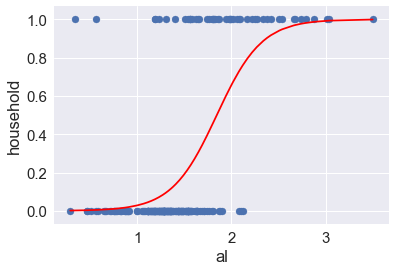

In [92]:
# plot the predicted probabilities again
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [93]:
# compute predicted log-odds for al=2 using the equation
logodds = logreg.intercept_ + logreg.coef_[0] * 2
logodds

array([ 0.64722323])

In [94]:
# convert log-odds to odds
odds = np.exp(logodds)
odds

array([ 1.91022919])

In [95]:
# convert odds to probability
prob = odds/(1 + odds)
prob

array([ 0.65638445])

In [97]:
# compute predicted probability for al=2 using the predict_proba method
print(logreg.predict_proba(2))
print(logreg.predict_proba(2)[:, 1])

[[ 0.34361555  0.65638445]]
[ 0.65638445]


In [99]:
# examine the coefficient for al
for i in zip(feature_cols, logreg.coef_[0]):
    print(i)

('al', 4.180403861451099)


Interpretation: A 1 unit increase in 'al' is associated with a 4.18 unit increase in the log-odds of 'household'.

In [100]:
# increasing al by 1 (so that al=3) increases the log-odds by 4.18
logodds = 0.64722323 + 4.1804038614510901
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

0.99205808391674566

In [101]:
# compute predicted probability for al=3 using the predict_proba method
logreg.predict_proba(3)[:, 1]

array([ 0.99205808])

Bottom line: 
    Positive coefficients increase the log-odds of the response 
    (and thus increase the probability), 
    and negative coefficients decrease the log-odds of the response 
    (and thus decrease the probability).

In [102]:
# examine the intercept
logreg.intercept_

array([-7.71358449])

Interpretation: For an 'al' value of 0, the log-odds of 'household' is -7.71.

In [103]:
# convert log-odds to probability
logodds = logreg.intercept_
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

array([ 0.00044652])

That makes sense from the plot above, because the probability of household=1 should be very low for such a low 'al' value.

In [104]:
# Logistic regression can still be used with categorical features.
# create a categorical feature
glass['high_Ba'] = np.where(glass.ba > 0.5, 1, 0)

glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,ri_pred,household,household_pred,household_pred_class,household_pred_prob,high_Ba
id,,,,,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227,0,-0.340495,0,0.001499,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103,1,-0.315436,0,0.001847,0
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0,0.003176,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0,0.003176,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682,0,-0.230236,0,0.003752,0


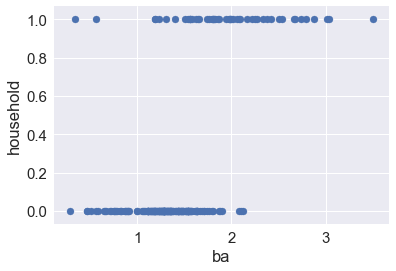

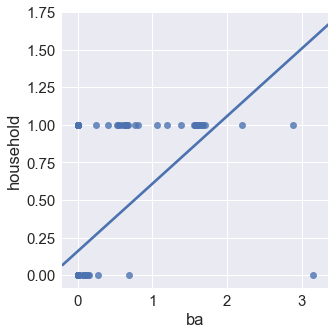

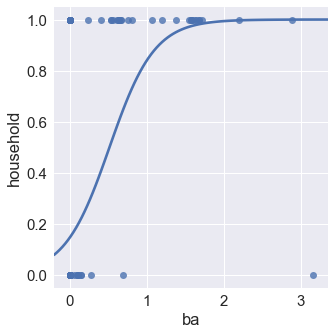

In [106]:
plt.scatter(glass.al, glass.household)
plt.xlabel('ba')
plt.ylabel('household')

sns.lmplot(x='ba', y='household', data=glass, ci=None)

sns.lmplot(x='ba', y='household', data=glass, ci=None, logistic=True)

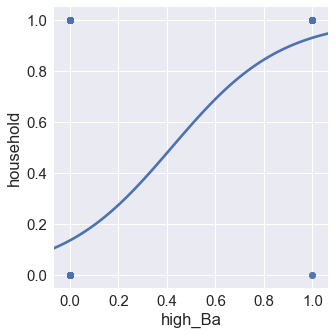

In [107]:
# categorical feature
sns.lmplot(x='high_Ba', y='household', data=glass, ci=None, logistic=True)

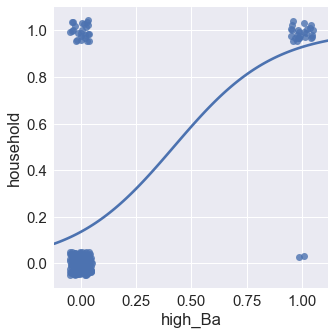

In [108]:
# categorical feature, with jitter added
sns.lmplot(x='high_Ba', y='household', data=glass, ci=None, logistic=True, x_jitter=0.05, y_jitter=0.05)

In [110]:
# fit a linear regression model and store the predictions
logreg = LogisticRegression(C=1e9)

feature_cols = ['high_Ba']

X = glass[feature_cols]

y = glass.household

logreg.fit(X, y)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [111]:
# examine the coefficient for high_ba
zip(feature_cols, logreg.coef_[0])

In [112]:
# [('high_ba', 4.4273153450187195)]
# Interpretation: Having a high 'ba' value is associated with a 4.43 unit increase in 
# the log-odds of 'household' (as compared to a low 'ba' value).